In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arabic-hwr-ai-pro-intake1/sample_submission.csv
/kaggle/input/arabic-hwr-ai-pro-intake1/train.csv
/kaggle/input/arabic-hwr-ai-pro-intake1/test.csv
/kaggle/input/arabic-hwr-ai-pro-intake1/test/01301.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02578.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/00929.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02630.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/01883.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/00704.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/03163.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/01124.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/01570.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/03092.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02640.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02422.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02284.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/00562.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02715.png
/kaggle/input/

In [2]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path
from PIL import Image

## less Important
from functools import partial
import os
from scipy import stats
import missingno as msno
import joblib
import tarfile
import shutil
import urllib

## Sklearn
from sklearn import datasets
## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Metrics
from sklearn.metrics import accuracy_score

## tensorflow & Keras
import tensorflow as tf    ## i will use tf for every thing and for keras using tf.keras

## Loading the Data and Look at the Big Picture

`Only for training here`

In [3]:
train_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/train.csv')
train_images = Path(r'../input/arabic-hwr-ai-pro-intake1/train')

## read these all training images paths as Series
train_images_paths = pd.Series(sorted(list(train_images.glob(r'*.png'))), name='Filepath').astype(str)

train_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/train/00000...
1    ../input/arabic-hwr-ai-pro-intake1/train/00001...
2    ../input/arabic-hwr-ai-pro-intake1/train/00002...
3    ../input/arabic-hwr-ai-pro-intake1/train/00003...
4    ../input/arabic-hwr-ai-pro-intake1/train/00004...
Name: Filepath, dtype: object

## Explore the Data

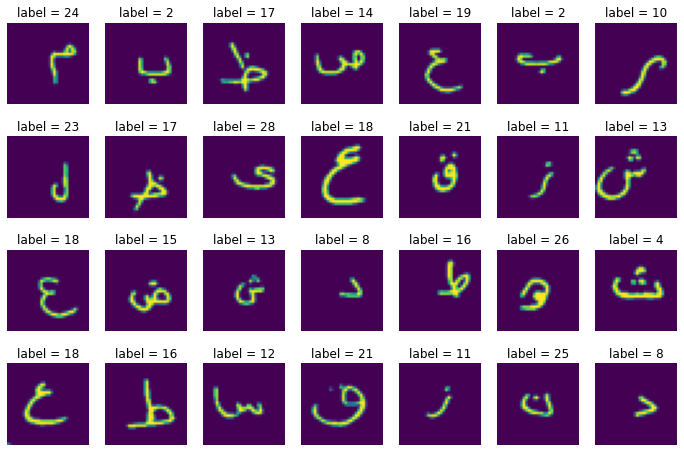

In [4]:
img_key_value = {}
for value in train_labels['label'].unique():
    img_key_value[value] = train_labels[train_labels['label']==value].index[0]
    
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

fig, ax = plt.subplots(4, 7, figsize=(12, 8))

i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        plt.title(f'label = {train_labels["label"].iloc[i]}')
        img = plt.imread(train_images_paths.iloc[i])
        plt.imshow(img)
        plt.axis('off')
        i+=1

In [5]:
print('Number of Instances in train_set =>', len(train_images_paths))
print('Number of Instances in train_labels =>', len(train_labels))

print()

img = plt.imread(train_images_paths.iloc[img_index[0]])
print('shape of each Image is =>', img.shape)

Number of Instances in train_set => 13440
Number of Instances in train_labels => 13440

shape of each Image is => (32, 32, 4)


## Data Preprocessing

In [6]:
train_full_labels = train_labels['label'].values
train_full_set = np.empty((13440, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(train_images_paths):
    img = plt.imread(path)

    img = img[:,:,:3]
    train_full_set[idx] = img
    
print('train_full_set.shape =>', train_full_set.shape)
print('train_full_labels.shape =>', train_full_labels.shape)

train_full_set.shape => (13440, 32, 32, 3)
train_full_labels.shape => (13440,)


## Split the Data

In [7]:
xd_train, X_valid, yd_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.1, shuffle=True, random_state=42,stratify=train_full_labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(xd_train, yd_train, 
                                                      test_size=0.1, shuffle=True, random_state=42,stratify=yd_train)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_test.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_test.shape)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_valid = tf.keras.utils.to_categorical(y_valid)

X_train.shape => (10886, 32, 32, 3)
X_valid.shape => (1210, 32, 32, 3)
y_train.shape => (10886,)
y_valid.shape => (1210,)


## Model Training

In [9]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="valid", activation='relu',input_shape=(32, 32, 3)),
#     tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
    
#     tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="valid", activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
   
    
#     tf.keras.layers.Conv2D(filters=256, kernel_size=3,padding="valid",activation='relu', ),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
# #     tf.keras.layers.Conv2D(filters=512, kernel_size=2,padding="valid",activation='relu', ),
# #     tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation='relu', ),
# #     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Conv2D(filters=512, kernel_size=3,padding="same",activation='relu', ),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
    
# #     tf.keras.layers.Conv2D(filters=512, kernel_size=3,padding="same",activation='relu', ),
# #     tf.keras.layers.MaxPooling2D(pool_size=2),
    
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(29, activation='softmax')
 
# ])


In [10]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (32,32,3)))
model.add(layers.Conv2D(filters=128, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.25))



model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.Conv2D(filters=1024, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(1024,activation=tf.nn.relu))
# model.add(layers.Dropout(0.25))
model.add(layers.Dense(29,activation=tf.nn.softmax))

2021-11-06 17:44:11.955914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-06 17:44:12.063890: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-06 17:44:12.064836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-06 17:44:12.066891: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [12]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
# optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = tf.keras.optimizers.Nadam(lr=0.001,epsilon=1e-09, decay=0.0)
model.compile(optimizer = optimizer, loss='categorical_crossentropy', 
             metrics=["accuracy"])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=4,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
#                     epochs=50, batch_size=32, callbacks=[early_stopp])
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=112),
                              epochs = 200, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 112
                              , callbacks=[learning_rate_reduction])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-11-06 17:44:15.475841: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2021-11-06 17:44:17.872860: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


97/97 - 19s - loss: 3.0053 - accuracy: 0.1358 - val_loss: 1.6655 - val_accuracy: 0.4504
Epoch 2/200
97/97 - 8s - loss: 1.2845 - accuracy: 0.5640 - val_loss: 0.5944 - val_accuracy: 0.7917
Epoch 3/200
97/97 - 9s - loss: 0.5823 - accuracy: 0.8025 - val_loss: 0.2978 - val_accuracy: 0.9008
Epoch 4/200
97/97 - 8s - loss: 0.4365 - accuracy: 0.8546 - val_loss: 0.3146 - val_accuracy: 0.8942
Epoch 5/200
97/97 - 8s - loss: 0.2794 - accuracy: 0.9068 - val_loss: 0.1736 - val_accuracy: 0.9405
Epoch 6/200
97/97 - 8s - loss: 0.2169 - accuracy: 0.9285 - val_loss: 0.1569 - val_accuracy: 0.9537
Epoch 7/200
97/97 - 9s - loss: 0.1801 - accuracy: 0.9389 - val_loss: 0.1485 - val_accuracy: 0.9554
Epoch 8/200
97/97 - 8s - loss: 0.1845 - accuracy: 0.9395 - val_loss: 0.1756 - val_accuracy: 0.9413
Epoch 9/200
97/97 - 8s - loss: 0.1446 - accuracy: 0.9533 - val_loss: 0.2320 - val_accuracy: 0.9256
Epoch 10/200
97/97 - 8s - loss: 0.2324 - accuracy: 0.9288 - val_loss: 0.1594 - val_accuracy: 0.9529
Epoch 11/200
97/97 -

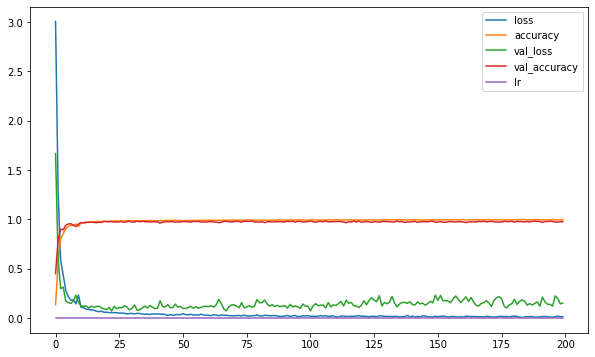

In [14]:
pd.DataFrame(history.history).plot(figsize=(10, 6));

In [15]:
train_full_labels = tf.keras.utils.to_categorical(train_full_labels)
loss_all_data, acc_all_data = model.evaluate(train_full_set, train_full_labels, verbose=0)
print('loss_all_data =>', loss_all_data)
print('acc_all_data =>', acc_all_data)

loss_all_data => 0.0277584046125412
acc_all_data => 0.9956101179122925


In [16]:
loss_all_data, acc_all_data = model.evaluate(X_valid, y_valid, verbose=0)
print('loss_all_data =>', loss_all_data)
print('acc_all_data =>', acc_all_data)

loss_all_data => 0.13132569193840027
acc_all_data => 0.980654776096344


## Evaluation on Testing DataSet

In [17]:
test_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/test.csv')
test_images = Path(r'../input/arabic-hwr-ai-pro-intake1/test')

## read these all training images paths as Series
test_images_paths = pd.Series(sorted(list(test_images.glob(r'*.png'))), name='Filepath').astype(str)

test_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/test/00000.png
1    ../input/arabic-hwr-ai-pro-intake1/test/00001.png
2    ../input/arabic-hwr-ai-pro-intake1/test/00002.png
3    ../input/arabic-hwr-ai-pro-intake1/test/00003.png
4    ../input/arabic-hwr-ai-pro-intake1/test/00004.png
Name: Filepath, dtype: object

In [18]:
print('Number of Instances in test_set is', len(test_images_paths))

Number of Instances in test_set is 3360


In [19]:
test_full_set = np.empty((3360, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(test_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    test_full_set[idx] = img
    
print('test_full_set.shape =>', test_full_set.shape)

test_full_set.shape => (3360, 32, 32, 3)


In [20]:
y_preds_classes = np.argmax(model.predict(test_full_set), axis=-1)

In [21]:
test_labels['label'] = y_preds_classes

In [22]:
test_labels

,id,label
0,0,26
1,1,10
2,2,1
3,3,10
4,4,15
...,...,...
3355,3355,16
3356,3356,6
3357,3357,4
3358,3358,11


In [23]:
test_labels[['id', 'label']].to_csv('/kaggle/working/submission.csv', index=False)

## Done :D